In [1]:
pip install gcsfs open3d numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install trimesh
%pip install rtree

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.1/541.1 kB 20.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import gcsfs
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
import trimesh
from trimesh import load_mesh
import rtree


Mesh A: 1547 vertices, 7138 faces
Mesh B: 3182 vertices, 13542 faces
### Metrics
volume_a: 9.03501810404587e-21
volume_b: 0.0
surface_area_a: 0.11276101596337759
surface_area_b: 0.303436537708903
bounds_a: [[-9.5090420e-02 -1.1859265e-01  6.9530000e-05]
 [ 9.1632380e-02  1.2304630e-01  3.9655930e-02]]
bounds_b: [[-0.09661605 -0.10093716  0.00026031]
 [ 0.09266295  0.10603996  0.20394455]]
Hausdorff Distance: 0.164895


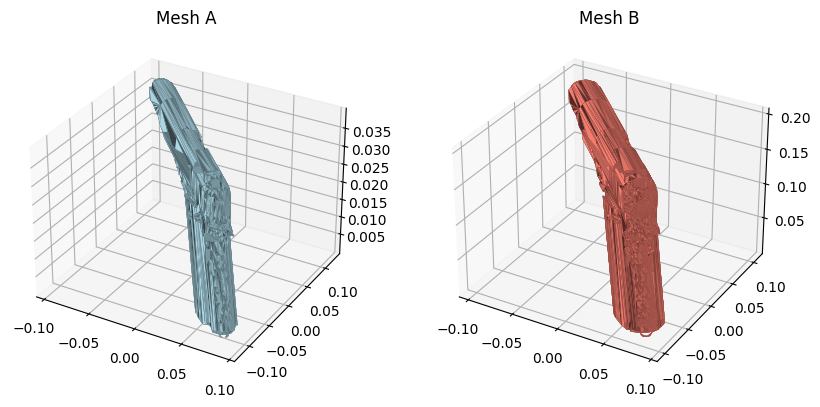

In [9]:
# %%
# # Mesh Comparison Notebook
# This notebook loads two mesh files, computes geometric metrics, and visualizes differences.

# %%
# %%
# ## 1. Setup and Imports
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

# If trimesh isn't installed, run the following cell to install it:
# %%

# %%
# ## 2. Load Meshes Load Meshes
path_a = 'data/grasp_sample/03948459/4dcc11b6acc758b1429a1687ed6390ec/0/mesh.obj'
path_b = 'data/grasp_sample/03948459/4dcc11b6acc758b1429a1687ed6390ec/1/mesh.obj'
mesh_a = trimesh.load(path_a)
mesh_b = trimesh.load(path_b)

print(f"Mesh A: {mesh_a.vertices.shape[0]} vertices, {mesh_a.faces.shape[0]} faces")
print(f"Mesh B: {mesh_b.vertices.shape[0]} vertices, {mesh_b.faces.shape[0]} faces")

# %%
# ## 3. Compute Basic Metrics
metrics = {}
metrics['volume_a'] = mesh_a.volume
metrics['volume_b'] = mesh_b.volume
metrics['surface_area_a'] = mesh_a.area
metrics['surface_area_b'] = mesh_b.area
metrics['bounds_a'] = mesh_a.bounds
metrics['bounds_b'] = mesh_b.bounds

print("### Metrics")
for k, v in metrics.items():
    print(f"{k}: {v}")

# %%
# ## 4. Hausdorff Distance between Surfaces
# Sample points on each surface
def sample_surface(mesh, count=10000):
    points, _ = trimesh.sample.sample_surface(mesh, count)
    return points

points_a = sample_surface(mesh_a)
points_b = sample_surface(mesh_b)

# Compute directed distances
dist_ab = trimesh.proximity.signed_distance(mesh_b, points_a)
dist_ba = trimesh.proximity.signed_distance(mesh_a, points_b)
hausdorff = max(np.max(np.abs(dist_ab)), np.max(np.abs(dist_ba)))
print(f"Hausdorff Distance: {hausdorff:.6f}")

# %%
# ## 5. Visualization
# Plot meshes side by side
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_trisurf(mesh_a.vertices[:,0], mesh_a.vertices[:,1], mesh_a.faces, mesh_a.vertices[:,2], color='lightblue', linewidth=0.1)
ax1.set_title('Mesh A')
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_trisurf(mesh_b.vertices[:,0], mesh_b.vertices[:,1], mesh_b.faces, mesh_b.vertices[:,2], color='salmon', linewidth=0.1)
ax2.set_title('Mesh B')
plt.show()

# %%
# ## 6. Color Difference Visualization
# Compute per-vertex distance of A to B
closest, distances, _ = trimesh.proximity.closest_point(mesh_b, mesh_a.vertices)

# Display colored mesh A by distance
dist_norm = distances / distances.max()
mesh_a.visual.vertex_colors = plt.cm.viridis(dist_norm) * 255

mesh_a.show()

# %%
# ## 7. Conclusion
# The notebook provided:
# - Basic mesh statistics
# - Hausdorff distance
# - Side-by-side visualizations
# - Per-vertex deviation coloring
